## 결정 트리 (Decision Tree)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#### 분류

In [ ]:
iris = load_iris()
X = iris.data[:, 2:] # petal length. petal width 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
         tree_clf,
         out_file="iris_tree.dot",
         feature_names = iris.feature_names[2:],
         class_names = iris.target_names,
         rounded = True,
         filled = True
)

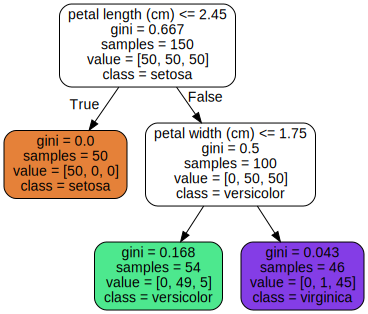

In [ ]:
import graphviz
with open("iris_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
tree_clf.predict_proba([[5, 1.5]]) # 5: petal length, 1.5: petal width   # 결과 : versicolor(1)

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

In [ ]:
tree_clf.feature_importances_

array([0.56199095, 0.43800905])

#### 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5)**2
y = y + np.random.randn(m, 1) / 10

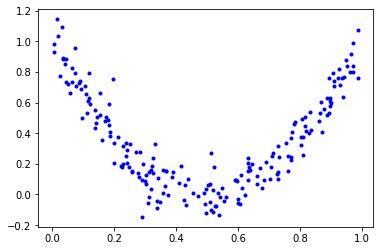

In [ ]:
plt.plot(X, y, "b.")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

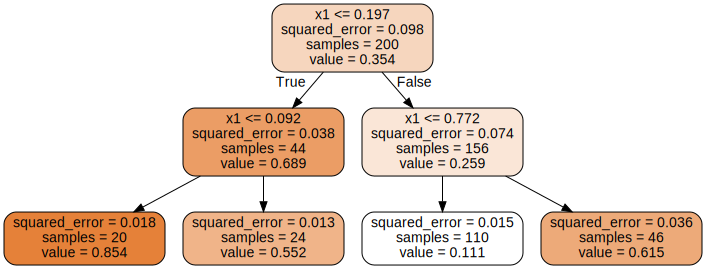

In [ ]:
export_graphviz(
        tree_reg,
        out_file ="regression_tree.dot",
        feature_names = ["x1"],
        rounded = True,
        filled = True
)

with open("regression_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
tree_reg.predict([[0.6]])

array([0.11063973])

## 앙상블 학습

#### 투표기반 분류기

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

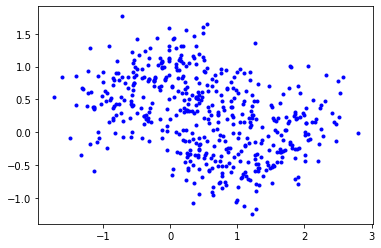

In [ ]:
plt.plot(X[:, 0], X[:,1], "b.")

Text(0, 0.5, 'X2')

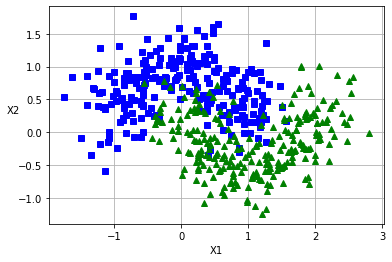

In [ ]:
plt.plot(X[:, 0][y==0], X[:,1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:,1][y==1], "g^")
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2", rotation=0)

- 하드 보팅

In [ ]:
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.svm import SVC # support vector machine

from sklearn.ensemble import VotingClassifier 

In [ ]:
# weak learner
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
# voting classifier
voting_clf = VotingClassifier(
    estimators= [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],  # estimators= [("이름", 분류기1), ("이름", 분류기2),  .....]
    voting ="hard"
)
from sklearn.metrics import accuracy_score # 정확도

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  # 학습
  clf.fit(X_train, y_train)
  # 예측
  predict = clf.predict(X_test)
  # 성능평가
  accuracy = accuracy_score(y_test, predict)  # 정확도 함수, 파라미터 : 정답, 예측
  # 출력
  print(clf.__class__.__name__, accuracy)

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [ ]:
log_clf.__class__.__name__

'LogisticRegression'

- 소프트 보팅

In [ ]:
# weak learner
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability= True, random_state=42) # SVC가 predict_proba 함수를 제공하지 않음, 대신 probability= True 로 세팅
# voting classifier
voting_clf = VotingClassifier(
    estimators= [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],  # estimators= [("이름", 분류기1), ("이름", 분류기2),  .....]
    voting ="soft"
)
from sklearn.metrics import accuracy_score # 정확도

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  # 학습
  clf.fit(X_train, y_train)
  # 예측
  predict = clf.predict(X_test)
  # 성능평가
  accuracy = accuracy_score(y_test, predict)  # 정확도 함수, 파라미터 : 정답, 예측
  # 출력
  print(clf.__class__.__name__, accuracy)

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


#### 배깅 앙상블

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples = 100, bootstrap=True, n_jobs=-1, random_state=42
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [ ]:
predict = bag_clf.predict(X_test)
accuracy_score(y_test, predict) # 정답, 예측 -> 정확도

0.904

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

predict = tree_clf.predict(X_test)
accuracy_score(y_test, predict)

0.856

- oob 평가

In [ ]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples = 100, bootstrap=True, oob_score = True, n_jobs=-1, random_state=42
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [ ]:
bag_clf.oob_score_

0.9253333333333333

In [ ]:
predict = bag_clf.predict(X_test)
accuracy_score(y_test, predict)

0.904

#### 랜덤 포레스트

- Bagging Classifier

In [ ]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(max_leaf_nodes= 16, random_state=42), n_estimators=500,
            bootstrap=True, n_jobs=-1, oob_score=True, random_state=42
          )
bag_clf.fit(X_train, y_train)
predict = bag_clf.predict(X_test)
accuracy_score(y_test, predict)

0.912

- RandomForest Classifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
predict = rnd_clf.predict(X_test)
accuracy_score(y_test, predict)

0.912

In [ ]:
rnd_clf.feature_importances_

array([0.42253629, 0.57746371])